**1. IMPORT REQUIRED LIBRARIES**

In [ ]:
# Import necessary libraries
# pandas: for data manipulation and analysis
# numpy: for numerical operations
# sklearn: for machine learning tasks
# seaborn: for visualization tasks
# WordCloud: for generating word cloud visualizations

# Handles the dataset and preprocessing
import pandas as pd
# Supports large matrices and numerical computations
import numpy as np
# Converts text data into numerical vectors
from sklearn.feature_extraction.text import CountVectorizer
# Splits the data into training and testing sets
from sklearn.model_selection import train_test_split
# Machine learning model for classification
from sklearn.naive_bayes import MultinomialNB
# Evaluates the model's performance
from sklearn.metrics import accuracy_score, classification_report
# For creating static, interactive, and publication-quality visualizations
import matplotlib.pyplot as plt
# For making statistical graphics more visually appealing and easier to create
import seaborn as sns
# Importing the WordCloud library for generating word cloud visualizations
from wordcloud import WordCloud, STOPWORDS




**2. IMPORT DATA SET**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

100%|██████████| 211k/211k [00:00<00:00, 36.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


**3. IMPORT FIRST FIVE ROWS IN A DATASET**

In [ ]:
# Load the dataset
# Assume the dataset is stored in a file named 'spam.csv' within the downloaded folder
# Load data with proper encoding
data = pd.read_csv(f"{path}/spam.csv", encoding='latin-1')

# Inspect the data
# Display the first 5 rows of the dataset to better understand its structure (it gives defaultly first 5 rows similarily if we use tail it will give last 5 rows of the data set)
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**4. IMPORT LAST FIVE ROWS IN A DATASET**

In [ ]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


**5. ALL ABOUT ROWS AND COLUMNS**

In [ ]:
#Complete dataset information by using INFO() METHOD
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#Calculating number of rows and colums by using SHAPE(ROWS COUNT,COLUMNS COUNT).
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  5572
Number of columns are:  5


In [ ]:
# Dataset Describe (all columns included and lets round upto 2 decimal places for easy interpretation )
data.describe(include= 'all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
#columns in a dataset
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
#datatype
data.dtypes

,0
v1,object
v2,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object


**6. DATA ANALYSIS**

In [ ]:
# Check Unique Values.
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


In [ ]:
# Dataset Duplicate Value Count
dupli = data.duplicated().sum()
print(f'number of duplicated rows are {dupli}')

number of duplicated rows are 403


In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
# Preprocess the data
# Keep only necessary columns: 'v1' and 'v2'and rename them with 'message'and 'label' for clarity
data.rename(columns={"v1": "Message", "v2": "Label"}, inplace=True)
data.head()

,Message,Label,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#dropping all duplicate records
data.drop_duplicates(inplace=True)
data.shape

(5169, 5)

In [ ]:
data.head()

,Message,Label,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Message' column.
#feature encoding
data['Spam'] = data['Message'].apply(lambda x: 1 if x == 'spam' else 0)
data.head()

,Message,Label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


In [ ]:
# Total number of 'ham' and 'spam' messages in 'message' column
data['Message'].value_counts()

,count
Message,
ham,4516
spam,653


In [ ]:
#the percentage of 'ham' and 'spam'
data['Message'].value_counts(normalize=True)*100

,proportion
Message,
ham,87.366996
spam,12.633004


**7. DATA VISUALIZATION**

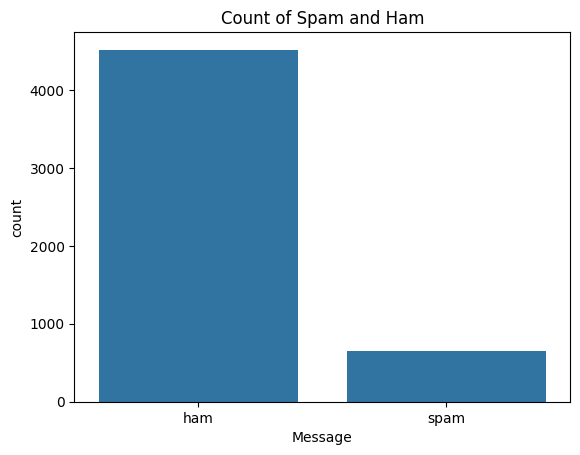

In [ ]:
# now lets plot a bar graph to understand better
sns.countplot(x=data['Message'])
plt.title('Count of Spam and Ham')
plt.show()

**Summarizing the insights of the graph:** dataset shows a significant imbalance, with ham (non-spam) messages far outnumbering spam messages. This imbalance may bias machine learning models, requiring resampling or class weighting. Enhancements like displaying exact counts, percentages, and using distinct bar colors can improve clarity. Imbalance handling is crucial for accurate spam detection.

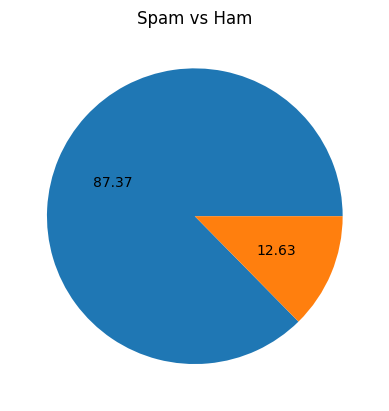

In [ ]:
# Calculating individal % of each category of 'Species' column in a pie chart

plt.pie(x=data['Message'].value_counts(),autopct='%.2f')
plt.title('Spam vs Ham')
plt.show()

**Summarizing the insights of the pie chart:** pie chart highlights that 87.37% of the dataset consists of ham (non-spam) messages, while only 12.63% are spam messages, confirming a significant class imbalance. This imbalance may skew model predictions, favoring the majority class (ham). Balancing techniques like resampling or using class weights are essential for fair model performance.

**8. TOP BUZZWORDS FOUND IN SPAM MESSAGES**

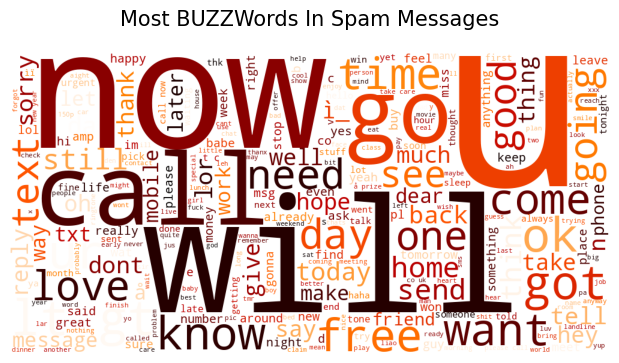

In [ ]:
# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in data.Label:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most BUZZWords In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

**9. PREPROCESSING OF A TEXT**


Preprocessing of text is a critical step in natural language processing (NLP) and involves preparing raw text data for analysis. The typical steps involved in text preprocessing include:

1. **Lowercasing**: Converting all the text to lowercase to ensure uniformity, as NLP models generally treat "Apple" and "apple" as two different words if not converted to the same case.

2. **Tokenization**: Splitting the text into smaller units, such as words, sentences, or subwords. This helps in analyzing individual components of the text.

3. **Removing Punctuation**: Punctuation marks like commas, periods, and exclamation marks are usually irrelevant for text analysis and are often removed.

4. **Removing Stop Words**: Common words such as "the", "is", "in", "on", etc., that do not carry significant meaning in text analysis are removed to reduce noise.

5. **Stemming**: Reducing words to their base or root form. For example, "running" becomes "run", and "better" becomes "good".

6. **Lemmatization**: Similar to stemming, but it involves reducing words to their dictionary form. For example, "was" becomes "be", and "running" becomes "run". Lemmatization considers the context of the word.

7. **Removing Special Characters**: Symbols like @, #, and other non-alphanumeric characters are removed if they don't add meaningful context.

8. **Removing Extra Whitespaces**: Extra spaces between words or sentences are often removed to avoid unnecessary tokens.

9. **Text Normalization**: This includes fixing inconsistent spelling (e.g., "colour" to "color"), handling contractions (e.g., "don't" to "do not"), and converting numbers to words if necessary.

10. **Handling URLs and Mentions**: In social media or web text, URLs (e.g., "www.example.com") and mentions (e.g., "@username") are usually removed or replaced by placeholders.

11. **Part-of-Speech Tagging (Optional)**: This involves identifying the grammatical parts of speech of each word (noun, verb, adjective, etc.), which can be useful for specific NLP tasks.

12. **Named Entity Recognition (Optional)**: This step involves identifying and classifying named entities like persons, organizations, locations, etc.



In [ ]:
# nltk -> natural language tool kit
# PUNKT is an unsupervised trainable model tokenizer
# It tokenizer divides a text into a list of sentences by using an unsupervised algorithm
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
print(string.punctuation,"\n\n")
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 


/bin/bash: -c: line 1: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 2: syntax error: unexpected end of file
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'w

In [ ]:
def transform_Label(message):

    # to convert all characters in lower case
    message=message.lower()

    # to break sms record into words
    message=nltk.word_tokenize(message)

    # to remove special symbals
    temp=[]
    for i in message:
        if i.isalnum():
            temp.append(i)

    # creating clone of temp
    message=temp[:]

    # clear the temp object
    temp.clear()

    # removing stopwords and punctuations
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)

    message=temp[:]
    temp.clear()

    # stemming
    for i in message:
        temp.append(ps.stem(i))


    return " ".join(temp)
# calling function 'transform_Label' by passing 'Label' records

data['Label']=data['Label'].apply(transform_Label)
# after transformation
data.head()

,Message,Label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Spam
0,ham,go jurong point crazi avail bugi n great world...,NaN,NaN,NaN,0
1,ham,ok lar joke wif u oni,NaN,NaN,NaN,0
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,NaN,NaN,NaN,1
3,ham,u dun say earli hor u c alreadi say,NaN,NaN,NaN,0
4,ham,nah think goe usf live around though,NaN,NaN,NaN,0


**10. CONVERTING "LABEL" INTO NUMERICAL VALUES**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
# converting into vectors
x=tfidf.fit_transform(data['Label']).toarray()
x.shape

(5169, 6708)

In [ ]:
#representation of array
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=data['Message'].values
y.shape

(5169,)

**11. SPLITING OF DATA**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (4135, 6708)
x_test - >   (1034, 6708)
y_train - >   (4135,)
y_test - >   (1034,)


**12. COMPARING ACCURACY & PRECISION TO CHOOSE THE BEST MODEL**

**LOGISTIC REGRESSION MODEL,RANDOM FOREST CLASSIFIER,MULTINOMIAL NAVIE BAYES**

In [ ]:
# Step 2: Train and evaluate models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
log_acc = accuracy_score(y_test, y_pred_log)
print("\nLogistic Regression Accuracy:", log_acc)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log, target_names=["Ham", "Spam"]))

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Classifier Accuracy:", rf_acc)
print("\nRandom Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["Ham", "Spam"]))

# Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)
y_pred_nb = nb_classifier.predict(x_test)
nb_acc = accuracy_score(y_test, y_pred_nb)
print("\nMultinomial Naive Bayes Accuracy:", nb_acc)
print("\nMultinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=["Ham", "Spam"]))



Logistic Regression Accuracy: 0.9487427466150871

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      0.99      0.97       889
        Spam       0.94      0.68      0.79       145

    accuracy                           0.95      1034
   macro avg       0.95      0.83      0.88      1034
weighted avg       0.95      0.95      0.95      1034


Random Forest Classifier Accuracy: 0.9671179883945842

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       889
        Spam       0.99      0.77      0.87       145

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.92      1034
weighted avg       0.97      0.97      0.97      1034


Multinomial Naive Bayes Accuracy: 0.9613152804642167

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   

Based on the outputs provided for the three models—**Logistic Regression**, **Random Forest Classifier**, and **Multinomial Naive Bayes**—let's analyze and compare their performance to determine the best model for the spam detection task.

---

### **Model Comparison**

| Metric                 | Logistic Regression | Random Forest Classifier | Multinomial Naive Bayes |
|------------------------|---------------------|--------------------------|-------------------------|
| **Accuracy**           | 94.87%             | **96.71%**               | 96.13%                 |
| **Precision (Ham)**    | 95%                | 96%                      | 96%                    |
| **Precision (Spam)**   | 94%                | **99%**                  | 99%                    |
| **Recall (Ham)**       | **99%**            | **100%**                 | **100%**               |
| **Recall (Spam)**      | 68%                | **77%**                  | 73%                    |
| **F1-Score (Ham)**     | 97%                | **98%**                  | **98%**                |
| **F1-Score (Spam)**    | 79%                | **87%**                  | 84%                    |
| **Macro Avg F1-Score** | 88%                | **92%**                  | 91%                    |

---

### **Observations**

1. **Logistic Regression**:
   - **Strengths**:
     - High accuracy (94.87%) and excellent recall for ham messages (99%).
     - Balanced performance between precision and recall for ham messages.
   - **Weakness**:
     - Struggles to detect spam messages effectively (recall for spam is only 68%), meaning it misses many spam messages.

2. **Random Forest Classifier**:
   - **Strengths**:
     - Highest overall accuracy (96.71%) and best performance for spam detection.
     - Best spam precision (99%) and improved recall (77%) compared to Logistic Regression.
     - Handles imbalanced classes well and achieves strong performance for both classes.
   - **Weakness**:
     - Slightly higher computational cost compared to Logistic Regression and Naive Bayes.

3. **Multinomial Naive Bayes**:
   - **Strengths**:
     - Very high accuracy (96.13%) and efficient performance with lightweight computations.
     - High precision (99%) for spam detection, similar to Random Forest.
   - **Weakness**:
     - Recall for spam (73%) is slightly lower than Random Forest.
     - May not generalize well for datasets with more complex relationships between features.

---

### **Which Model is Best?**

The **Random Forest Classifier** emerges as the best model based on the provided metrics:

1. **Best Accuracy**: Random Forest achieves the highest accuracy (96.71%).
2. **Superior Spam Detection**: It balances precision (99%) and recall (77%) for spam messages, leading to the highest F1-score (87%) for spam detection.
3. **Handling Imbalanced Classes**: Random Forest's ensemble nature allows it to handle the imbalanced distribution of ham and spam effectively.
4. **Generalizability**: Random Forest is robust for various datasets due to its ability to capture non-linear patterns and relationships.

While **Multinomial Naive Bayes** is a strong competitor with its high efficiency and accuracy, its slightly lower recall for spam (73%) makes it less suitable if minimizing missed spam is critical.

**Conclusion**: **Random Forest Classifier** is the best choice for spam detection in this case, as it provides the most balanced and reliable performance for both ham and spam messages.

**13. MODEL IMPLEMENTATION**

In [ ]:
import pickle
pickle.dump(rf_classifier,open('model.sav','wb'))

In [ ]:
#### Saving the Tfidf Object for vectorizing 'input_sms' (converting text into numeric form)
pickle.dump(tfidf,open('tfidf_vectorizer.sav','wb'))

In [ ]:
#Checking whether our model working fine or not ??
load_model_mnb=pickle.load(open('model.sav','rb'))
load_tfidf=pickle.load(open('tfidf_vectorizer.sav','rb'))

In [ ]:
input_sms='Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s'

In [ ]:
input_sms

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [ ]:
input_sms=load_tfidf.transform([input_sms])
pred=load_model_mnb.predict(input_sms)[0]
print(pred)

spam


In [ ]:
#Deployment code :-
'''
import numpy as np
import pickle
import streamlit as st
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()


# loading our model file (model.sav) into this program
load_model_mnb=pickle.load(open('model.sav','rb'))

# loading tfidf vectorizer object file for text encoding
load_tfidf=pickle.load(open('tfidf_vectorizer.sav','rb'))

def transform_sms(message):

    # to convert all characters in lower case
    message=message.lower()

    # to break list into words
    message=nltk.word_tokenize(message)
    # to remove special symbals

    temp=[]
    for i in message:
        if i.isalnum():
            temp.append(i)

    message=temp[:]   # create clone of y
    temp.clear()

    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)

    message=temp[:]
    temp.clear()

    for i in message:
        temp.append(ps.stem(i))

    return " ".join(temp)

# main() for web app interface and input tasks
def main():

    # for wide look
    st.set_page_config(layout="wide")


    st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://images.pexels.com/photos/167699/pexels-photo-167699.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1");
             background-attachment: fixed;
             background-size: cover
         }}
         </style>
         """,
         unsafe_allow_html=True
     )


    html_temp="""

    <div style="background-color:DarkBlue;padding:10xp">
    <h2 style="color:white;text-align:center;">SMS Spam Detection Model </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)


    input_sms=st.text_area("**Enter the message for testing**")

    # sms transformation
    input_sms=transform_sms(input_sms)

    # tfidf vectorizzer
    input_sms=load_tfidf.transform([input_sms])

    # prediction using model
    pred=load_model_mnb.predict(input_sms)[0]

    # button for prediction
    if st.button("Predict"):
        if pred == 1:
            st.success("**Spam sms **💬 ")
        else:
            st.success("**Not Spam sms **💬")


if __name__ == '__main__':
    main()



'''

'\nimport numpy as np\nimport pickle\nimport streamlit as st\nimport string\nimport nltk\nnltk.download(\'punkt\')\nnltk.download(\'wordnet\')\nnltk.download(\'stopwords\')\nfrom nltk.corpus import stopwords\nfrom nltk.stem.porter import PorterStemmer\n\nps=PorterStemmer()\n\n\n# loading our model file (model.sav) into this program\nload_model_mnb=pickle.load(open(\'model.sav\',\'rb\'))\n\n# loading tfidf vectorizer object file for text encoding \nload_tfidf=pickle.load(open(\'tfidf_vectorizer.sav\',\'rb\'))\n\ndef transform_sms(message):\n    \n    # to convert all characters in lower case\n    message=message.lower()\n    \n    # to break list into words\n    message=nltk.word_tokenize(message)\n    # to remove special symbals\n    \n    temp=[]\n    for i in message:\n        if i.isalnum():\n            temp.append(i)\n\n    message=temp[:]   # create clone of y\n    temp.clear()\n    \n    for i in message:\n        if i not in stopwords.words(\'english\') and i not in string.punc